<a href="https://colab.research.google.com/github/rikrikrahadian/DQLab/blob/main/Part_6_Data_Handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***DATA HANDLING***
Pada pertemuan kesebelas ini, akan disampaikan materi terkait *Data Handling* -- mulai dari proses parsing, manipulasi, dan pengolahan agar dapat dihasilkan sebuah dataframe yang siap dianalisis lebih lanjut untuk memperoleh *insights*. Dalam latihan kali ini, kita akan menggunakan salah satu dataset dari koleksi datasets yang disediakan oleh **R** secara gratis pada [Link](https://vincentarelbundock.github.io/Rdatasets/datasets.html) berikut.

Meskipun pada pertemuan terdahulu, telah disampaikan materi terkait manipulasi data beserta prakteknya, pada kenyataannya, seringkali manipulasi data tidak dapat segera dilakukan akibat dari kondisi dataset yang kita peroleh belum siap untuk diolah lebih lanjut. Oleh karena itu, *data handling* menjadi sebuah proses yang sangat penting dan penguasaan seorang data analyst terhadapnya menjadi sebuah prasyarat penting.

Proses *data handling* mensyaratkan penguasaan beragam teknik pengolahan data yang meliputi teknik-teknik mulai dari parsing data, manipulasi kolom data, pembuatan ringkasan statistik, visualisasi data, hingga ke pemahaman pola yang muncul dalam data. Tingkat kesulitan dari proses ini akan sangat tergantung pada kondisi dataset yang tersedia. Dataset yang tergolong sudah rapi cenderung akan mudah untuk di-*handle*, sebaliknya *dataset* yang 'berantakan' akan membutuhkan waktu *handling* yang jauh lebih panjang. Oleh karena itu, paparan terhadap berbagai jenis data set dari bermacam sumber akan meningkatkan kemahiran data analis dalam melakukan *data handling*.  

Meskipun sebenarnya sudah diperkenalkan secara sekilas pada pertemuan-pertemuan terdahulu, pertemuan ini secara khusus difokuskan ke pemanfaatan modul **pandas** dalam **Python** sebagai alat untuk melakukan *data handling*, melalui kegiatan praktek langsung. Pada praktek kali ini, berbagai `functions` dan `methods`, baik yang telah disampaikan pada pertemuan-pertemuan sebelumnya maupun yang baru akan diterapkan terhadap dataset `Titanic.csv` untuk menghasilkan sebuah dataset yang rapi hingga siap dipergunakan sebagai bahan analisis lebih lanjut. Untuk membantu memahami berbagai teknik yang diterapkan, maka pada hampir setiap proses akan disertakan juga **TECHNICAL NOTE** yang merupakan penjelasan ringkas dari teknik yang diterapkan.

## ***Dataset Titanic***
> Dataset Titanic berisikan informasi rinci tentang penumpang yang berada di kapal **MS. Titanic**, yang tenggelam pada 15 April 1912 setelah bertabrakan dengan gunung es, dan merupakan salah satu dataset yang paling populer digunakan dalam *data science* terutama untuk materi klasifikasi.

Salah satu jenis analisis yang paling umum dilakukan menggunakan dataset Titanic adalah melakukan *Survival Analysis* yang melibatkan pembangunan model *Machine Learning* untuk memprediksi kelangsungan hidup penumpang berdasarkan karakteristiknya. Fitur seperti jenis kelamin dan kelas memiliki dampak signifikan terhadap tingkat kelangsungan hidup seorang penumpang. Sebagai ilustrasi, wanita dan anak-anak akan memiliki peluang hidup yang lebih tinggi dibanding kelompok lain, karena adanya protokol evakuasi yang mendahulukan kedua kelompok tersebut. Selain itu penumpang di kelas yang lebih tinggi (1st) memiliki peluang selamat yang lebih besar dibandingkan dengan mereka yang menumpang di kelas lebih rendah (2nd dan 3rd).

Di dalam modul **pandas** tersedia beberapa *tools* untuk melakukan data handling, seperti:

1. **Membaca Data**:
   - [`pd.read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html): Untuk membaca file CSV.
   - [`pd.read_json()`](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html): Untuk parsing data JSON.
   - [`pd.read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html): Untuk membaca data dari file Excel.
   - [`pd.read_sql()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html): Untuk membaca query SQL ke dalam DataFrame.
   
2. **Pembersihan Data**: Setelah parsing, data sering kali perlu dibersihkan, seperti menangani nilai yang hilang, memformat string, atau menghapus duplikat. Beberapa `methods` yang sangat berguna dalam proses ini antara lain:
   - [`df.fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html): untuk mengisi data `NaN` dengan value tertentu secara serentak;
   - [`df.dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html): untuk menghapus rows/columns yang mengandung `NaN`; dan
   - [`df.replace()`](): untuk menggantikan suatu value dengan value yang ditentukan.

3. **Parsing String**: `Access Method` `str` yang tersedia pada pandas memungkinkan manipulasi dan parsing data teks, sehingga lebih mudah mengekstrak informasi dari string menggunakan beberapa method seperti:
  1. `df.str.split()`;
  2. `df.str.contains()`; dan
  3. `df.str.extract()` untuk parsing berbasis regular expression.

4. **Parsing Tanggal**: Fungsi `pd.to_datetime()` dapat memparsing string tanggal dalam berbagai format ke objek datetime yang sesuai untuk pengolahan. Fungsi ini akan berperan penting ketika bekerja dengan data deret waktu.

## EXERCISE 1: *Data Parsing*
Data parsing mengacu pada proses ekstraksi, interpretasi, dan transformasi data dari satu format ke format lain, sehingga siap untuk dianalisis. Dalam konteks **data science**, kemampuan melakukan parsing data yang berasal dari berbagai sumber, seperti CSV, JSON, XML, atau *database*, adalah salah satu keterampilan yang paling penting. Tujuan utama dari *parsing* adalah mengubah data mentah menjadi bentuk terstruktur, seperti **DataFrame** dalam **pandas**, yang siap digunakan untuk analisis.

In [1]:
import pandas as pd

In [2]:
# Set file path
file_path_titanic = 'https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/Titanic.csv'

# Data Parsing
df_titanic = pd.read_csv(file_path_titanic).set_index('rownames')

# 5 rows teratas
df_titanic.head()

,Name,PClass,Age,Sex,Survived,SexCode
rownames,,,,,,
1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


### Pengecekan Awal

*Preliminary Checking* adalah tahap perkenalan paling awal dengan dataset yang akan ditangani. Umumnya perkenalan terhadap dataset dimulai dengan menggali informasi terkait struktur, dan statistik deskriptif dari dataset. Dari hasil *preliminary checking* ini seorang data analis dapat menilai berbagai kekurangan dari dataset, sehingga memperoleh **perkiraan** awal proses apa saja yang perlu dilakukan untuk mempersiapkan data bagi analisis lebih lanjut.

Pengenalan struktur dataset dilakukan dengan mencari informasi terkait dimensi dataset, seperti jumlah rows serta kolom yang terdapat pada dataset tersebut. Informasi penting lain yang biasanya diperoleh pada tahap ini adalah tipe data pada masing-masing kolom, berbagai pattern dari formatting data yang dikenakan, dan kelengkapan data setiap rows pada dataset.

Sebagai pendalaman, pada tahap selanjutnya biasanya dilakukan analisis statistik deskriptif untuk memperoleh informasi sebaran dari data pada masing-masing kolom. Berbagai indikator yang dihasilkan dari analisis statistik desktiptif--semacam frekuensi, nilai minimum dan maksimum, rata-rata, median, kwartil pertama, kwartil ketiga, serta modus--dapat membantu kita untuk mengetahui kondisi dataset lebih mendalam.

#### Struktur Dataset

In [3]:
# Cek lima rows paling atas
df_titanic.head()

,Name,PClass,Age,Sex,Survived,SexCode
rownames,,,,,,
1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


In [4]:
# Cek lima rows paling bawah
df_titanic.tail()

,Name,PClass,Age,Sex,Survived,SexCode
rownames,,,,,,
1309,"Zakarian, Mr Artun",3rd,27.0,male,0,0
1310,"Zakarian, Mr Maprieder",3rd,26.0,male,0,0
1311,"Zenni, Mr Philip",3rd,22.0,male,0,0
1312,"Lievens, Mr Rene",3rd,24.0,male,0,0
1313,"Zimmerman, Leo",3rd,29.0,male,0,0


In [5]:
# Cek Struktur Data
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1313 entries, 1 to 1313
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1313 non-null   object 
 1   PClass    1313 non-null   object 
 2   Age       756 non-null    float64
 3   Sex       1313 non-null   object 
 4   Survived  1313 non-null   int64  
 5   SexCode   1313 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 71.8+ KB


___
**RESUME**: Struktur Dataset

Tuliskan temuan dari proses pengecekan visual struktur data!
1. Bagaimana format penulisan pada kolom `Name`?
2. Apakah terdapat pattern tertentu pada penulisan data pada kolom `Name`?
2. Adakah kolom yang dirasa tidak perlu?
3. Bagaimana kelengkapan data masing-masing kolom?
___

#### Statistik Deskriptif

In [6]:
# Cek Statistik Deskriptif
df_titanic.describe() # Secara default hanya menampilkan Stat Desc untuk kolom numeric

,Age,Survived,SexCode
count,756.000000,1313.000000,1313.000000
mean,30.397989,0.342727,0.351866
std,14.259049,0.474802,0.477734
min,0.170000,0.000000,0.000000
25%,21.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000
75%,39.000000,1.000000,1.000000
max,71.000000,1.000000,1.000000


In [7]:
# Cek Statistik Deskriptif
df_titanic.describe(include='object') # Untuk menampilkan Stat Desc tipe data tertentu (float, int, object, category, all)

,Name,PClass,Sex
count,1313,1313,1313
unique,1310,4,2
top,"Kelly, Mr James",3rd,male
freq,2,711,851


___
**RESUME**: Statistik Deskriptif

Tuliskan hasil temuan Analisis Deskriptif!!
1. Adakah data penumpang yang terduplikasi?
2. Berapa banyak data penumpang yang diduga terduplikasi?
3. Berapa banyak kategori penumpang?.
___

### Pengecekan Lanjutan
*Follow up checking* adalah tahap dimana berbagai pertanyaan, dan dugaan terkait isi dari dataset dijawab, sehingga seorang data analis dapat menggali informasi lebih dalam dan jauh lebih mengenali dataset yang sedang ditangani.

Beberapa temuan penting pada pengecekan terdahulu atas dataset pada dataframe `df_titanic` adalah sebagai berikut:
1. Terdapat duplikasi data:
  - Perlu diverifikasi apakah duplikasi Nama terjadi karena pencatatan terhadap objek yang sama;
  - Perlu dicermati apakah terjadi duplikasi baris pada dataset.
2. Terdapat *Missing Values*:
  - Harus dicermati rows mana saja yang terdapat *missing values*;
  - Harus dicermati seberapa banyak *missing values* yang ada;
  - Harus diputuskan apa yang harus dilakukan terhadap *missing values* yang ada (dihapus, diisi) dan jika harus diisi, metode apa yang akan dipergunakan untuk mengisi.
3. Terdapat *formatting* penulisan data pada kolom `Name` dan `PClass`, sehingga perlu dicermati keseragaman data pada kedua kolom tersebut.

#### Pengecekan Duplikasi
Salah satu hal yang harus dipastikan ketika melakukan data handling adalah, **tidak ada rows yang terduplikasi**. Dalam hal ini, yang dimaksud dengan duplikasi adalah kejadian di mana sebuah transaksi tercatat secara berulang pada dataset. Rows yang terduplikasi harus dihilangkan dari dataset, karena dapat mengakibatkan bias pada hasil analisis.

Modul `pandas` menyediakan method `duplicated` dan `drop_duplicates` untuk melakukan penanganan terhadap rows yang terduplikasi. Berikut ini adalah ilustrasi penggunaan method `duplicated` untuk mengamati dan menghilangkan rows yang terduplikasi:
```python
# MENGAMATI ROWS TERDUPLIKASI
# 1. Buat filter untuk rows terduplikat
filter_duplicated_first = dataframe.duplicated(keep='first')
filter_duplicated_last = dataframe.duplicated(keep='last')
filter_duplicated_False = dataframe.duplicated(keep=False)

# 2. Sortir data menggunakan salah satu filter di atas
dataframe.loc[filter_duplicated_first, :].sort_values(by=list(dataframe.columns))

# MENGHILANGKAN ROWS TERDUPLIKASI
# 1. Menghilangkan seluruh rows duplikasi selain rows duplikasi pertama
dataframe.drop_duplicates(keep='first', inplace=True)

# 2. Menghilangkan seluruh rows duplikasi selain rows duplikasi terakhir
dataframe.drop_duplicates(keep='last', inplace=True)

# 3. Menghilangkan seluruh rows duplikasi tanpa kecuali
dataframe.drop_duplicates(keep=False, inplace=True)
```
___

#### Ilustrasi 1: Handling Duplicated Rows

In [8]:
"""
Amir, Budi, Cici, dan Didi bermain lempar dadu sebanyak 6 ronde.
Hasil setiap lemparan masing-masingnya dicatat pada dataframe df.
Akan tetapi terjadi kesalahan pencatatan,
sehingga terdapat dua ronde yang tercatatkan 2 kali.
"""
data = {
  "Amir":[1, 2, 3, 4, 1, 1, 6, 4],
  "Budi":[3, 1, 1, 1, 3, 4, 5, 1],
  "Cici":[4, 4, 4, 4, 4, 4, 4, 4],
  "Didi":[6, 6, 6, 6, 6, 6, 6, 6]
}

# Parse data menjadi sebuah dataframe
df = pd.DataFrame(data)

# Cek isi dataframe
df

,Amir,Budi,Cici,Didi
0,1,3,4,6
1,2,1,4,6
2,3,1,4,6
3,4,1,4,6
4,1,3,4,6
5,1,4,4,6
6,6,5,4,6
7,4,1,4,6


In [9]:
# Cek duplicate jika "keep='first'"
filter_duplicated_first = df.duplicated(keep='first')
df.loc[filter_duplicated_first, :]

,Amir,Budi,Cici,Didi
4,1,3,4,6
7,4,1,4,6


In [10]:
# Cek duplicate jika "keep='last'"
filter_duplicated_last = df.duplicated(keep='last')
df.loc[filter_duplicated_last, :]

,Amir,Budi,Cici,Didi
0,1,3,4,6
3,4,1,4,6


In [11]:
# Cek duplicate jika "keep=False"
filter_duplicated_false = df.duplicated(keep=False)
df.loc[filter_duplicated_false, :].sort_values(by=list(df.columns))

,Amir,Budi,Cici,Didi
0,1,3,4,6
4,1,3,4,6
3,4,1,4,6
7,4,1,4,6


In [12]:
# Buang seluruh duplikat kecuali data duplikat pertama
df.drop_duplicates(keep='first')

,Amir,Budi,Cici,Didi
0,1,3,4,6
1,2,1,4,6
2,3,1,4,6
3,4,1,4,6
5,1,4,4,6
6,6,5,4,6


In [13]:
# Buang seluruh duplikat kecuali duplikat terakhir
df.drop_duplicates(keep='last')

,Amir,Budi,Cici,Didi
1,2,1,4,6
2,3,1,4,6
4,1,3,4,6
5,1,4,4,6
6,6,5,4,6
7,4,1,4,6


In [14]:
# Buang seluruh duplikat tanpa kecuali
df.drop_duplicates(keep=False)

,Amir,Budi,Cici,Didi
1,2,1,4,6
2,3,1,4,6
5,1,4,4,6
6,6,5,4,6


___
1. Duplicated Rows

In [15]:
# Buat filter menggunakan method 'duplicated'
filter_duplicated_rows = df_titanic.duplicated(keep=False)

# Pergunakan filter_duplicated_rows untuk memfilter dataframe
df_titanic.loc[filter_duplicated_rows, :]

,Name,PClass,Age,Sex,Survived,SexCode
rownames,,,,,,


2. Duplicated `Name` Values

In [16]:
# Buat Filter menggunakan method 'duplicated'
filter_duplicated_names = df_titanic.duplicated(subset='Name', keep=False)

# Lakukan filtering dataframe menggunakan filter_duplicated_names
df_titanic.loc[filter_duplicated_names, :]

,Name,PClass,Age,Sex,Survived,SexCode
rownames,,,,,,
45,"Carlsson, Mr Frans Olof",1st,33.0,male,0,0
708,"Carlsson, Mr Frans Olof",3rd,33.0,male,0,0
729,"Connolly, Miss Kate",3rd,30.0,female,0,1
730,"Connolly, Miss Kate",3rd,22.0,female,1,1
922,"Kelly, Mr James",3rd,44.0,male,0,0
923,"Kelly, Mr James",3rd,42.0,male,0,0


___
**RESUME**: *Duplications*

Seteleh melakukan pengamatan terhadap data terduplikasi, apa yang kira-kira harus dilakukan terhadap nama-nama yang terduplikasi?

___
#### Mendeteksi *Missing Values*
Modul `pandas` menotasikan *missing values* sebagai `NaN`, sebuah object bertipe `float`, yang sering kali diartikan sebagai *Not a Number*. Dalam bahasa pemrograman SQL, padanan dari `NaN` ini adalah `null`, yang merupakan indikasi tidak ada nilai yang tercatat untuk *field* tersebut.

Seperti nilai `null`, `NaN` tidak dihitung dalam proses agregasi seperti `count` maupun `sum`, sehingga keberadaannya akan sangat mempengaruhi hasil dari analisis. Oleh karena itu, penanganan *missing values* merupakan salah satu proses yang sangat penting dalam *data handling*, terutama jika data akan digunakan dalam permodelan statistik atau *Machine Learning*. Ada beberapa pendekatan yang bisa diambil untuk menangani *missing values*, tergantung pada konteks dan tujuan analisis:

1. Penghapusan (*Deletion*)<br>
   **Jenis dan cara** penghapusan:
   - **Penghapusan Kolom:** Jika sebuah kolom memiliki banyak *missing values*, lebih efisien untuk menghapus seluruh kolom tersebut, terutama jika variabel tersebut tidak relevan atau tidak memberikan kontribusi signifikan dalam analisis.
   ```python
   df.dropna(axis=1)
   ```
   - **Penghapusan Baris:** Jika hanya sebagian kecil baris yang mengandung *missing values*, kita dapat mempertimbangkan untuk menghapus baris-baris tersebut. Penghapusan baris umum dilakukan jika data yang hilang bersifat acak dan tidak berjumlah besar.
   ```python
   df.dropna(axis=0)
   ```

  **Kapan Melakukan Deletion**: <br>
  *Deletion* lebih tepat digunakan jika jumlah *missing values* relatif sedikit, atau saat data yang hilang tidak memiliki signifikansi bagi analisis.

2. Pengisian Nilai (*Imputation*)<br>
   Pengisian nilai adalah alternatif lain yang sering kali lebih baik dibandingkan penghapusan data, terutama jika kita perlu menjaga ukuran dataset. Pengisian nilai dapat dilakukan dengan berbagai cara:
   - **Mengisi dengan Nilai Konstan:** Misalnya, kita bisa menggantikan *missing values* dengan nilai tertentu seperti 0, atau kata "Unknown" untuk tipe data teks.
   ```python
   df.fillna(0)
   df.fillna("Unknown")
   ```
   - **Mengisi dengan Statistik:** *Missing values* bisa diisi dengan nilai rata-rata (*mean*) atau median--bagi data `numeric`--atau modus--bagi data `string`--dari data lain yang tersedia. Cara ini sering digunakan jika data *missing* terdistribusi secara acak.
   ```python
   df.fillna(df['Age'].mean())
   df.fillna(df['Age'].median())
   df.fillna(df['Firstname'].mode())
   ```
   - **Interpolasi:** Teknik interpolasi menggunakan data di sekitar *missing values* untuk memperkirakan nilai yang hilang. Interpolasi ini sangat tepat untuk dipergunakan jika dataset berisikan data deret waktu atau data kontinu.
   ```python
   df.interpolate()
   ```

  **Kapan Melakukan Imputation:** <br>
  *Imputation* lebih tepat untuk dilakukan jika kolom atau baris dengan *missing values* mengandung informasi penting, atau jika penghapusan akan menyebabkan hilangnya terlalu banyak data. Namun, metode yang digunakan harus dipilih dengan hati-hati agar tidak mengubah karakteristik asli data.
___

#### Ilustrasi 2: Missing Values
1. Rows with missing values

In [17]:
# Creating Filter for missing value
filter_missing_values = df_titanic['Age'].isnull()

# Selecting Rows with missing Age value
df_titanic.loc[filter_missing_values, :]

,Name,PClass,Age,Sex,Survived,SexCode
rownames,,,,,,
13,"Aubert, Mrs Leontine Pauline",1st,NaN,female,1,1
14,"Barkworth, Mr Algernon H",1st,NaN,male,1,0
15,"Baumann, Mr John D",1st,NaN,male,0,0
30,"Borebank, Mr John James",1st,NaN,male,0,0
33,"Bradley, Mr George",1st,NaN,male,1,0
...,...,...,...,...,...,...
1301,"Wiseman, Mr Phillippe",3rd,NaN,male,0,0
1303,"Yalsevac, Mr Ivan",3rd,NaN,male,1,0
1306,"Youssef, Mr Gerios",3rd,NaN,male,0,0


In [18]:
# Creating filter
filter_non_missing_values = ~df_titanic['Age'].isnull()
# df_titanic['Age'].notnull()

# Selecting rows with Age value not missing
df_titanic.loc[filter_non_missing_values, :]

,Name,PClass,Age,Sex,Survived,SexCode
rownames,,,,,,
1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
...,...,...,...,...,...,...
1309,"Zakarian, Mr Artun",3rd,27.00,male,0,0
1310,"Zakarian, Mr Maprieder",3rd,26.00,male,0,0
1311,"Zenni, Mr Philip",3rd,22.00,male,0,0


2. How many missing values in each columns

In [19]:
# Lakukan method chaining 'isnull' atau 'isna' lalu 'sum' terhadap df_titanic
df_titanic.isnull().sum()

,0
Name,0
PClass,0
Age,557
Sex,0
Survived,0
SexCode,0


___
**RESUME**: *Missing Values*

Write down your findings here:
1. ... abacab ...
2. ... abacab ...
___

#### Pengecekan Konsistensi Format Data String

#### Ilustrasi 3: String Formatting
1. Kolom `Name` memisahkan `surname` dengan `title` dan `firstname` menggunakan karakter koma

In [20]:
# Set pattern yang akan di cek
pattern_koma = ","

# create filter for values with comma
filter_comma = df_titanic['Name'].str.contains(pat=pattern_koma, na=False, regex=True)

# Select rows using negation of filter_comma
df_titanic.loc[~filter_comma, :]

,Name,PClass,Age,Sex,Survived,SexCode
rownames,,,,,,
457,Jacobsohn Mr Samuel,*,NaN,male,0,0
1196,Seman Master Betros,3rd,NaN,male,0,0


2. Format penulisan values pada kolom `Name` menggunakan ***Title Case***

In [21]:
# Tentukan pattern yang akan dicari
pattern_to_find = "\\b[a-z]+\\b"

# Buat filter menggunakan pattern_to_find
filter_lower_case = df_titanic['Name'].str.contains(pat=pattern_to_find, regex=True, na=False)

# Select Rows menggunakan filter_lower_case
df_titanic.loc[filter_lower_case, :]

,Name,PClass,Age,Sex,Survived,SexCode
rownames,,,,,,
8,"Andrews, Mr Thomas, jr",1st,39.0,male,0,0
53,"Cassebeer, Mrs Henry Arthur jr (Genevieve Fosd...",1st,NaN,female,1,1
82,"de Villiers, Madame Berthe",1st,NaN,female,1,1
196,"Ovies y Rodriguez, Mr Servando",1st,28.0,male,0,0
202,"Penasco, Mr Victor de Satode",1st,18.0,male,0,0
203,"Penasco, Mrs Victor de Satode (Josefa de Soto)",1st,17.0,female,1,1
215,"Rothes, the Countess of (Noel Lucy Martha Dyer...",1st,27.0,female,1,1
264,"Thayer, Mr John Borland, jr",1st,17.0,male,1,0
265,"Thorne, Mr George (alias of: Mr George Rosensh...",1st,46.0,male,0,0


___
**TECHNICAL NOTES**: `REGEX`
>Method `str.contains` di atas menggunakan **`Python Regular Expression Operation`**, biasa diacu sebagai **`regex`**, untuk memeriksa apakah setiap value mengandung string dengan pola tertentu. `regex` biasanya dipergunakan untuk menemukan padanan dari pola tertentu pada data berupa `string`.

`Regex` sebetulnya bukan hal yang asing, sebagai ilustrasi, kita pasti pernah melakukan proses pembuatan password, dimana biasanya melibatkan **Validasi** untuk memastikan terpenuhinya beberapa syarat tertentu, seperti:
  - Minimal jumlah karakter adalah 8;
  - Minimal salah satu karakter tersebut berupa angka;
  - Minimal salah satu karakter tersebut berupa huruf kapital; dan
  - Minimal salah satu karakter tersebut berupa *special character*.

Untuk mempelajari lebih lanjut terkait **`regex`** silahkan cermati dokumentasinya pada tautan [**`berikut`**](https://docs.python.org/3/library/re.html).

Beberapa notasi `regex` umum:
1. `"\\b"` atau `r"\b"` ==> notasi bagi **Word Boundary**;
2. `"[a-z]"` ==> notasi bagi seluruh karakter alfabet lowercase;
3. `"[A-Z]`" ==> notasi bagi seluruh karakter alfabet uppercase;
4. `"[0-9]"` ==> notasi bagi seluruh karakter numeric;
5. `"+"` ==> notasi bagi **kemungkinan** berulangnya pola string sebelumnya;
6. `"*"` ==> notasi bagi adanya pengulangan pola string sebelumnya;
7. `"^"` ==> notasi bagi pola di awal dari string;
8. `"$"` ==> notasi bagi pola di akhir dari string;
9. `"|"` ==> notasi bagi alternatif pola;
10. `"{x}"` ==> notasi bagi pengulangan karakter sebanyak x kali;
11. `"{a, b}"` ==> notasi bagi pengulangan karakter sebanyak antara a hingga b kali;
12. `"{b, }"` ==> notasi bagi pengulangan karakter setidaknya sebanyak b kali.

Berdasarkan daftar notasi di atas, maka arti harfiah dari notasi `regex` `pattern_to_find` di contoh kasus di atas adalah:

>"Pola berupa **rangkaian string** (kata) yang terdiri dari **minimal satu** karakter **alfabet** berformat **lowercase**".

Cara Penulisan notasi `regex`:
```python
string_pattern = "\\b[a-z]+\\b"     # Sebuah Pattern regex bertipe string
raw_string_pattern = r"\b[a-z]+\b"  # Sebuah pattern regex bertipe raw string
```

Cermati kedua **regular expression** di bawah berikut:
```python
regex_1 = "\\b[A-Z][a-z]+\\b"
regex_2 = r"\b0817[0-9]+\b"
```
Lalu coba jawab dua soal di bawah ini.

In [22]:
# @title 1. Berikan tanda cek pada string yang sesuai dengan pola pada regex_1:
from IPython.display import display
import ipywidgets as widgets

# Function to check answers
def check_answers(correct_answers, options, result_widget):
    # Get the current user answers
    user_answers = tuple(option.value for option in options)

    # Check if user answers match the correct answers
    if user_answers == correct_answers:
        feedback = "Jawaban Anda Benar!"
    else:
        feedback = "Jawaban Anda Salah!"

    result_widget.value = feedback

correct_answers_1 = (False, False, True, True, True)

# Create checkboxes for each option in Question 1
option_a_1 = widgets.Checkbox(value=False, description='a. "AMIR"')
option_b_1 = widgets.Checkbox(value=False, description='b. "amir"')
option_c_1 = widgets.Checkbox(value=False, description='c. "Amir Hamzah"')
option_d_1 = widgets.Checkbox(value=False, description='d. "Amir"')
option_e_1 = widgets.Checkbox(value=False, description='e. "Am"')

options = [option_a_1, option_b_1, option_c_1, option_d_1, option_e_1]

# Output box for feedback
result_1 = widgets.Textarea(value="", placeholder='Feedback', description='', disabled=True)

# Button to check answers for Question 1
check_button_1 = widgets.Button(description="Cek Jawaban")
check_button_1.on_click(lambda event: check_answers(correct_answers_1, options, result_1))

# Display the interactive form for Question 1
display(option_a_1, option_b_1, option_c_1, option_d_1, option_e_1, check_button_1, result_1)

Checkbox(value=False, description='a. "AMIR"')

Checkbox(value=False, description='b. "amir"')

Checkbox(value=False, description='c. "Amir Hamzah"')

Checkbox(value=False, description='d. "Amir"')

Checkbox(value=False, description='e. "Am"')

Button(description='Cek Jawaban', style=ButtonStyle())

Textarea(value='', disabled=True, placeholder='Feedback')

In [23]:
# @title 2. Berikan tanda cek pada String yang sesuai dengan pola pada regex_2:
correct_answers_2 = (True, False, True, False, True)

# Create checkboxes for each option in Question 1
option_a_2 = widgets.Checkbox(value=False, description="a. '08170'")
option_b_2 = widgets.Checkbox(value=False, description='b. "081902345"')
option_c_2 = widgets.Checkbox(value=False, description='c. "08170000"')
option_d_2 = widgets.Checkbox(value=False, description='d. "0817 8787 8988"')
option_e_2 = widgets.Checkbox(value=False, description='e. "081733"')

options_2 = [option_a_2, option_b_2, option_c_2, option_d_2, option_e_2]

# Output box for feedback
result_2 = widgets.Textarea(value="", placeholder='Feedback', description='', disabled=True)

# Button to check answers for Question 1
check_button_2 = widgets.Button(description="Cek Jawaban")
check_button_2.on_click(lambda event: check_answers(correct_answers_2, options_2, result_2))

# Display the interactive form for Question 1
display(option_a_2, option_b_2, option_c_2, option_d_2, option_e_2, check_button_2, result_2)

Checkbox(value=False, description="a. '08170'")

Checkbox(value=False, description='b. "081902345"')

Checkbox(value=False, description='c. "08170000"')

Checkbox(value=False, description='d. "0817 8787 8988"')

Checkbox(value=False, description='e. "081733"')

Button(description='Cek Jawaban', style=ButtonStyle())

Textarea(value='', disabled=True, placeholder='Feedback')

___
3. Setiap value pada `Name` terdiri dari `Surname`, `Title`, dan `Firstname`

Di bawah berikut dicontohkan cara untuk mengumpulkan informasi terkait berbagai Title yang terdapat pada dataset, dengan menggunakan sebuah user-defined function yang terdapat pada modul functions. Untuk memanfaatkan modul tersebut, silahkan unduh pada link [berikut](https://drive.google.com/file/d/1dXMuGyplSRowrLZ-_tvowhavE7rJ3Xw_/view?usp=drive_link), lalu unggah file tersebut ke environment.

In [26]:
# import fungsi create_title_pattern ke environment
from functions import create_title_pattern

In [27]:
# Cek dokumentasi fungsi tersebut
help(create_title_pattern)

Help on function create_title_pattern in module functions:

create_title_pattern(df: object, nama_kolom: str) -> str
    FUNGSI UNTUK MEMBUAT TITLE PATTERN DARI STR VALUE PADA SEBUAH KOLOM
    ARGUMENTS:
      1. df : object, dataframe yang akan dibuatkan pattern;
      2. nama_kolom : str, nama kolom yang valuenya berisi pattern.
    OUTPUT:
      Sebuah str berisi pattern titel.



In [28]:
# Buat title_pattern untuk dipakai mengekstrak Title dari kolom Name
title_pattern = create_title_pattern(df_titanic, 'Name')

                        Pattern yang sudah ditambahkan ke list adalah sebagai berikut:                        
                                           (Mrs|Mr|Miss|Ms|Master)                                            
--------------------------------------------------------------------------------------------------------------
                                     Nama-nama pada kolom Firstname = 49                                      :
['Astor, Colonel John Jacob', 'Brewe, Dr Arthur Jackson', 'Butt, Major Archibald Willingham', 'Crosby, Captain Edward Gifford', 'de Villiers, Madame Berthe']
['Dodge, Dr Washington', 'Duff Gordon, Sir Cosmo Edmund', 'Duff Gordon, Lady (Lucille Wallace Sutherland)', 'Frauenthal, Dr Henry William', 'Gracie, Colonel Archibald IV']
['Leader, Dr Alice Farnham', 'Minahan, Dr William Edward', 'Peuchen, Major Arthur Godfrey', 'Reuchlin, Jonkheer John George', 'Rothes, the Countess of (Noel Lucy Martha Dyer-Edwardes)']
['Simonius-Blumer, Col Alfons', 'Staehl

In [29]:
# Cek hasil pemrosesan
title_pattern

'(Mrs|Mr|Miss|Ms|Master|Colonel|Dr|Major|Captain|Madame|Sir|Lady|Jonkheer|the Countess of|Col|Mlle|Rev|)'

---
**TECHNICAL NOTE**: `REGEX`

Arti dari notasi `regex`:
```python
contoh_pattern = r"\b(Mr|Mrs)\b"
```
> "Pola rangkaian string yang mengandung `Mrs` atau `Mr`.
___
**RESUME**: `Name` Formatting

Write your findings down here:
1. ---
2. ---
___

##### Column `PClass`

Di bawah berikut akan dilakukan pengecekan terhadap elemen unik pada kolom PClass.

In [30]:
# Cek elemen unik yang dimuat dalam kolom
df_titanic['PClass'].unique()

array(['1st', '2nd', '*', '3rd'], dtype=object)

In [31]:
# Cek rows dengan penulisan yang tidak seragam
df_titanic.loc[df_titanic['PClass']=='*', :]

,Name,PClass,Age,Sex,Survived,SexCode
rownames,,,,,,
457,Jacobsohn Mr Samuel,*,NaN,male,0,0


___
**RESUME**: `PClass` Values

Write your findings down here:
1. ... abacab ...
2. ... abacab ...
___

## EXERCISE 2: *Data Manipulation*

Dari pengamatan terhadap data di atas, terdapat beberapa hal yang perlu untuk dilakukan terhadap dataset, antara lain:
1. Menyeragamkan Formatting `Name`:
  - Penambahan karakter `,` pada rows tanpa koma pada kolom `Name`;
  - Penyeragaman penulisan title `Colonel`==`Col`.
2. Memiisahkan values pada kolom `Name` menjadi :
  - `Title`;
  - `Surname`;
  - `Firstname`.
3. Mengisi missing values pada kolom:
  - `Title`; dan
  - `Age` berdasarkan `Title`.

### `Name` Formatting
1. Manipulating rows with `Name` value without Comma

In [32]:
# Cek values pada kolom 'Name' yang tidak mengandung ","
df_titanic.loc[~df_titanic['Name'].str.contains(","), ['Name']]

,Name
rownames,
457,Jacobsohn Mr Samuel
1196,Seman Master Betros


___
**TECHNICAL NOTE:**

Untuk manipulasi penyisipan karakter ini, ketika dilakukan dengan menggunakan software spreadsheet, biasanya kita akan menerapkan algoritma manipulasi seperti berikut:
1. Filter dataframe untuk menunjukkan hanya rows dan kolom yang akan dimanipulasi, lalu terhadapnya assign hasil manipulasi;
2. Proses manipulasi:
  - Ambil seluruh elemen dari kolom yang akan dimanipulasi;
  - Filter ke rows spesifik bagi data yang akan dimanipulasi;
  - Lakukan manipulasi.
___

In [33]:
', '.join(["Johny", "Cash"])

'Johny, Cash'

In [34]:
df_titanic.loc[[457, 1196], ['Name']] = (  # Assign ke kolom 'Name' dengan rows terfilter:
    df_titanic['Name']                                               # Values pada kolom 'Name' yang difilter agar
    .loc[[457, 1196]]                      # hanya rows berisi strings tidak ber-",", lalu
    .apply(lambda name: ", ".join(name.split(" ", maxsplit=1)))      # sisipkan karakter ", " tepat setelah nama belakangnya.
)

In [35]:
# Menyisipkan koma ke value  tanpa ", " pada kolom Name
df_titanic.loc[~df_titanic['Name'].str.contains(","), ['Name']] = (  # Assign ke kolom 'Name' dengan rows terfilter:
    df_titanic['Name']                                               # Values pada kolom 'Name' yang difilter agar
    .loc[~df_titanic['Name'].str.contains(",")]                      # hanya rows berisi strings tidak ber-",", lalu
    .apply(lambda name: ", ".join(name.split(" ", maxsplit=1)))      # sisipkan karakter ", " tepat setelah nama belakangnya.
)

In [36]:
# Cek hasil manipulasi, seharusnya tidak ada lagi values pada `Name` tanpa ","
df_titanic.loc[~df_titanic['Name'].str.contains(","), :]

,Name,PClass,Age,Sex,Survived,SexCode
rownames,,,,,,


In [37]:
df_titanic.loc[[457, 1196], :]

,Name,PClass,Age,Sex,Survived,SexCode
rownames,,,,,,
457,"Jacobsohn, Mr Samuel",*,NaN,male,0,0
1196,"Seman, Master Betros",3rd,NaN,male,0,0


___
**TECHNICAL NOTE**

> Perhatikan penulisan *script* manipulasi data di atas. `Method chaining` yang biasanya dituliskan dalam 1 baris dapat di*break down* seperti dicontohkan. Pada dasarnya, tidak ada perbedaan pada output yang dihasilkan antara penulisan `method chaining` dalam 1 baris atau terpotong-potong, akan tetapi penulisan terpotong meningkatkan readability dari script, sehingga dianjurkan untuk dilakukan jika `method chaining` yang dipakai cukup panjang.

Sebagai ilustrasi, cermati kedua scripts di bawah berikut, cara penulisan mana yang lebih mudah untuk dimengerti??
```python
# Ilustrasi `method chaining` 1 baris
df_titanic['Name'].loc[~filter_comma].apply(lambda name: ", ".join(name.split(" ", maxsplit=1)))

# Ilustrasi `method chaining` terpotong-potong
(
  df_titanic['Name']
  .loc[~filter_comma]
  .apply(lambda name: ", ".join(name.split(" ", maxsplit=1))))
```

> *Accessor* `loc` sangat berguna dalam proses *data handling*, terutama pada saat melakukan perubahan `value` pada `row` dan `kolom` tertentu.

```python
# Merubah nilai pada row dan kolom tertentu
df.loc[<row_index|row_filter>, <nama_kolom>] = <Nilai pengganti>
```
___

2. Standardizing title: turn all `Col` into `Colonel`

In [38]:
# Cek rows yang mengandung karakter 'Col` dan 'Colonel'
# 1. Set pattern
pattern_col_or_colonel = r"\b(Col|Colonel)\b"

# 2. Buat filter
filter_col_colonel = (               # Assign ke variabel filter_for_colonel
    df_titanic['Name']               # Values pada kolom 'Name' yang
    .str                             # diolah menggunakan operasi `string`
    .contains(                       # menggunakan method `contains` untuk memverifikasi
        pat=pattern_col_or_colonel,  # apakah mengandung pattern_col_or_colonel atau tidak
        regex=True,                  # set parameter pattern_col_or_colonel sebagai `regex`
        na=False)                    # set argumen na dengan parameter False
)

# 3. Sortir dataframe menggunakan filter yang sudah dibuat
df_titanic.loc[filter_col_colonel, :]

/tmp/ipython-input-38-3876908472.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  .contains(                       # menggunakan method `contains` untuk memverifikasi


,Name,PClass,Age,Sex,Survived,SexCode
rownames,,,,,,
11,"Astor, Colonel John Jacob",1st,47.0,male,0,0
121,"Gracie, Colonel Archibald IV",1st,54.0,male,1,0
232,"Simonius-Blumer, Col Alfons",1st,56.0,male,1,0
273,"Weir, Col John",1st,60.0,male,0,0


___
**TECHNICAL NOTE**

Proses manipulasi pengubahan karakter ini akan menerapkan proses yang sedikit berbeda dengan sebelumnya, ketika dilakukan dengan menggunakan software spreadsheet, biasanya kita akan menerapkan algoritma sebagai berikut:
1. Ambil semua elemen dari kolom yang akan di manipulasi, lalu assign kepadanya hasil pengolahan;
2. Proses pengolahan:
  - Cek satu persatu elemen, apakah mengandung karakter yang akan dirubah atau tidak;
  - Lakukan perubahan ke setiap elemen yang mengandung karakter tersebut.
___

In [39]:
# Mengganti setiap title `Col' menjadi 'Colonel'
df_titanic['Name'] = (    # Assign ke kolom 'Name':
    df_titanic['Name']    # Values dari kolom 'Name'
    .str                  # yang diolah menggunakan accessor `string`
    .replace(             # menggunakan method `replace` untuk mengganti
        "\\bCol\\b",      # setiap rangkaian string 'Col'
        "Colonel",        # dengan rangkaian string 'Colonel'
        regex=True))

In [40]:
# Cek hasil penyeragaman
df_titanic.loc[filter_col_colonel, :]

,Name,PClass,Age,Sex,Survived,SexCode
rownames,,,,,,
11,"Astor, Colonel John Jacob",1st,47.0,male,0,0
121,"Gracie, Colonel Archibald IV",1st,54.0,male,1,0
232,"Simonius-Blumer, Colonel Alfons",1st,56.0,male,1,0
273,"Weir, Colonel John",1st,60.0,male,0,0


### Splitting `Name` Values
1. Surname from `Name`

In [41]:
# Cek semua values pada kolom Name
df_titanic['Name'].head()

,Name
rownames,
1,"Allen, Miss Elisabeth Walton"
2,"Allison, Miss Helen Loraine"
3,"Allison, Mr Hudson Joshua Creighton"
4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)"
5,"Allison, Master Hudson Trevor"


**TECHNICAL NOTE**

Untuk melakukan manipulasi pemisahan values pada elemen nama ini, maka kita akan melakukan proses dengan algoritma sebagai berikut:
1. Buat sebuah dataframe baru berisikan data hasil manipulasi;
2. Proses manipulasi:
  - Ambil seluruh elemen pada kolom `Name` pada `df_titanic`;
  - Lakukan proses `string` menggunakan method split;
  - Lakukan penyesuaian nama kolom

In [42]:
# Split values pada Name dengan comma
df_passenger_names = (                               # Assign ke `df_passenger_names` dataframe yang dihasilkan dari:
    df_titanic['Name']                               # Series berisi value kolom `Name` pada df_titanic yang
    .str                                             # diolah menggunakan accessor `string` dengan
    .split(                                          # menggunakan method `split`
        pat=", ",                                    # untuk memecah value pada series berdasarkan karakter ', '
        n=1,                                         # sebanyak 1 kali
        expand=True)                                 # dimana hasilnya diexpand menjadi DataFrame tersendiri
    .rename(                                         # lalu dilanjut dengan method 'rename'
        columns={0:'Surname', 1:'Firstname'})        # untuk merubah nama kolom 0 dan 1 menjadi `Surname` dan `Firstname`
)
df_passenger_names

,Surname,Firstname
rownames,,
1,Allen,Miss Elisabeth Walton
2,Allison,Miss Helen Loraine
3,Allison,Mr Hudson Joshua Creighton
4,Allison,Mrs Hudson JC (Bessie Waldo Daniels)
5,Allison,Master Hudson Trevor
...,...,...
1309,Zakarian,Mr Artun
1310,Zakarian,Mr Maprieder
1311,Zenni,Mr Philip


### Extracting Title from `Firstname`

In [43]:
title_pattern

'(Mrs|Mr|Miss|Ms|Master|Colonel|Dr|Major|Captain|Madame|Sir|Lady|Jonkheer|the Countess of|Col|Mlle|Rev|)'

**TECHNICAL NOTE**

Untuk memisahkan Title dari elemen pada kolom `Firstname`, maka kita akan memanfaatkan hasil pengumpulan pattern Title, `title_pattern`, yang sudah kita lakukan sebelumnya. Adapun algoritma pengerjaannya adalah sebagai berikut:
1. Buat kolom baru bernama `Title` pada `df_passenger` yang diisikan data hasil manipulasi;
2. Proses manipulasi:
  - Ambil seluruh elemen pada kolom `Firstname` pada `df_passsenger_name`;
  - Lakukan proses `string` dengan method `extract`, menggunakan `title_pattern` sebagai argumen bagi parameter `pat`;

In [44]:
# Extrak Title dari value pada kolom `Firstname` simpan ke kolom baru `Title`
df_passenger_names['Title'] = (       # Buat kolom baru bernama `Title` pada `df_passenger_names` untuk diassign:
    df_passenger_names['Firstname']   # Series berisi Values dari kolom 'Firstname' pada df_passenger_names yang
    .str                              # diolah menggunakan operasi `string` dengan
    .extract(                         # menggunakan method `extract` untuk
        pat=title_pattern)            # mengambil karakter pada value yang sesuai dengan `title_pattern`
)

df_passenger_names.head()

,Surname,Firstname,Title
rownames,,,
1,Allen,Miss Elisabeth Walton,Miss
2,Allison,Miss Helen Loraine,Miss
3,Allison,Mr Hudson Joshua Creighton,Mr
4,Allison,Mrs Hudson JC (Bessie Waldo Daniels),Mrs
5,Allison,Master Hudson Trevor,Master


#### Omitting Title from `Firstname`'s values

In [45]:
# Cek Kondisi penulisan `Firstname`
df_passenger_names.head()

,Surname,Firstname,Title
rownames,,,
1,Allen,Miss Elisabeth Walton,Miss
2,Allison,Miss Helen Loraine,Miss
3,Allison,Mr Hudson Joshua Creighton,Mr
4,Allison,Mrs Hudson JC (Bessie Waldo Daniels),Mrs
5,Allison,Master Hudson Trevor,Master


In [46]:
# Penghapusan pattern Title dari value pada `Firstname`
df_passenger_names['Firstname'] = (      # Assign ke ...... values yang dihasilkan dari:
    df_passenger_names['Firstname']      # Olahan dari .....
    .str                                 # dengan accessor .....
    .replace(                            # menggunakan method .....
        f"{title_pattern}",              # untuk mengubah .....
        "",                              # menjadi .....
        regex=True)                      # set parameter ..... dengan argumen .....
    .str                                 # lalu olah lebih lanjut dengan accessor .....
    .strip()                             # menggunakan metode ..... untuk .....
)

# Cek 5 rows teratas dari hasil olahan
df_passenger_names.head()

,Surname,Firstname,Title
rownames,,,
1,Allen,Elisabeth Walton,Miss
2,Allison,Helen Loraine,Miss
3,Allison,Hudson Joshua Creighton,Mr
4,Allison,Hudson JC (Bessie Waldo Daniels),Mrs
5,Allison,Hudson Trevor,Master


#### Joining Two DataFrames

In [47]:
df_titanic.head()

,Name,PClass,Age,Sex,Survived,SexCode
rownames,,,,,,
1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


In [48]:
df_passenger_names.head()

,Surname,Firstname,Title
rownames,,,
1,Allen,Elisabeth Walton,Miss
2,Allison,Helen Loraine,Miss
3,Allison,Hudson Joshua Creighton,Mr
4,Allison,Hudson JC (Bessie Waldo Daniels),Mrs
5,Allison,Hudson Trevor,Master


In [49]:
# 1. Buat list kolom yang diperlukan
final_columns_list = ['Title', 'Firstname', 'Surname', 'PClass', 'Age', 'Survived', 'SexCode']

# 2. Gabungkan df_titanic, dengan df_passenger_names berdasarkan indeksnya
df_titanic_all = (
    df_titanic
    .join(df_passenger_names, how='left')
    .loc[:, final_columns_list]
)

# Cek Visual hasil penggabungan
df_titanic_all.head()

,Title,Firstname,Surname,PClass,Age,Survived,SexCode
rownames,,,,,,,
1,Miss,Elisabeth Walton,Allen,1st,29.00,1,1
2,Miss,Helen Loraine,Allison,1st,2.00,0,1
3,Mr,Hudson Joshua Creighton,Allison,1st,30.00,0,0
4,Mrs,Hudson JC (Bessie Waldo Daniels),Allison,1st,25.00,0,1
5,Master,Hudson Trevor,Allison,1st,0.92,1,0


In [50]:
title_pattern

'(Mrs|Mr|Miss|Ms|Master|Colonel|Dr|Major|Captain|Madame|Sir|Lady|Jonkheer|the Countess of|Col|Mlle|Rev|)'

In [51]:
" Rikrik Rahadian".strip()

'Rikrik Rahadian'

In [52]:
df_titanic_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1313 entries, 1 to 1313
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      1313 non-null   object 
 1   Firstname  1313 non-null   object 
 2   Surname    1313 non-null   object 
 3   PClass     1313 non-null   object 
 4   Age        756 non-null    float64
 5   Survived   1313 non-null   int64  
 6   SexCode    1313 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 114.4+ KB


---
**TECHNICAL NOTE**

Modul `pandas` menyediakan beberapa metode untuk menggabungkan beberapa *dataframe*, yang berguna dalam pengolahan data saat informasi yang kita perlukan tersebar di berbagai sumber. Penggabungan data dapat dilakukan berdasarkan berbagai kondisi seperti kesamaan kolom, posisi indeks, atau penyambungan secara vertikal/horizontal. Tiga metode utama yang disediakan oleh `pandas` adalah:

a. `pd.DataFrame.merge`<br>
[`merge`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) digunakan untuk menggabungkan dua *dataframe* dengan cara yang mirip dengan operasi `JOIN` pada SQL. Kita dapat menyatukan dua tabel berdasarkan satu atau beberapa kolom yang memiliki nilai kunci yang sama di kedua tabel.

**Contoh Penggunaan**:
  ```python
  df_merged = df1.merge(df2, left_on='key_column', right_on='key_column', how='inner')
  ```
  - `left_on='key_column'`: Kolom yang menjadi dasar penggabungan di df1 (dataframe kiri).
  - `right_on='key_column'`: Kolom yang menjadi dasar penggabungan di df2 (dataframe kanan).
  - `how='inner'`: Tipe penggabungan (`'inner'`, `'left'`, `'right'`, `'outer'`).
    - `'inner'`: Hanya menggabungkan baris yang memiliki kunci yang sama di kedua *dataframe*.
    - `'left'`: Semua baris dari *dataframe* kiri, dan baris yang cocok dari *dataframe* kanan.
    - `'right'`: Semua baris dari *dataframe* kanan, dan baris yang cocok dari *dataframe* kiri.
    - `'outer'`: Semua baris dari kedua *dataframe*, baik yang cocok maupun yang tidak.

  `merge` sangat fleksibel dan memungkinkan penggunaan multi-key joins serta penggabungan dengan kolom yang bernama berbeda.

b. `pd.DataFrame.join`<br>
[`join`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html) digunakan untuk menggabungkan *dataframe* berdasarkan indeks. Jika kita memiliki dua tabel yang memiliki struktur indeks yang sama, kita dapat menyatukan data berdasarkan indeks tersebut.

**Contoh Penggunaan**:
```python
df_joined = df1.join(df2, how='left')
```
- `how='left'`: Penggabungan tipe `'left'` berdasarkan indeks yang serupa pada kedua *dataframe*.

`join` biasanya lebih sederhana digunakan jika kita sudah memiliki indeks yang tepat pada kedua tabel, dan lebih cocok untuk data dengan relasi berbasis indeks.

c. `pd.concat`<br>
[`concat`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) digunakan untuk menggabungkan beberapa *dataframe* secara vertikal (penambahan baris) atau horizontal (penambahan kolom), tanpa membutuhkan kesamaan kunci atau indeks.

**Contoh Penggunaan**:
```python
df_concatenated = pd.concat([df1, df2], axis=0, ignore_index=True)
```
- `axis=0`: Menyambung baris (*stacking* data secara vertikal).
- `axis=1`: Menyambung kolom (*side-by-side* data secara horizontal).
- `ignore_index=True`: Mengatur ulang indeks pada *dataframe* yang digabungkan.

`concat` memungkinkan kita untuk menggabungkan lebih dari dua *dataframe* sekaligus, dan sering digunakan untuk menggabungkan data yang terpisah dalam beberapa bagian atau jika kita ingin menggabungkan data tanpa syarat kesamaan kunci.

---

### Handling Missing Values
#### Imputations for Title Values

In [53]:
# Cek struktur dari dataframe
df_titanic_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1313 entries, 1 to 1313
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      1313 non-null   object 
 1   Firstname  1313 non-null   object 
 2   Surname    1313 non-null   object 
 3   PClass     1313 non-null   object 
 4   Age        756 non-null    float64
 5   Survived   1313 non-null   int64  
 6   SexCode    1313 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 114.4+ KB


In [54]:
# Cek rows dengan missing Title Value
no_title = df_titanic_all.loc[df_titanic_all['Title'].isna(), :]

no_title

,Title,Firstname,Surname,PClass,Age,Survived,SexCode
rownames,,,,,,,


In [55]:
df_titanic_all.loc[[861, 864, 865, 1180], :]

,Title,Firstname,Surname,PClass,Age,Survived,SexCode
rownames,,,,,,,
861,,Hilda Maria,Hellstrom,3rd,22.0,1,1
864,,Delia,Henery,3rd,NaN,0,1
865,,Jenny Lovisa,Henriksson,3rd,28.0,0,1
1180,,Thomas (child),Sage,3rd,NaN,0,0


In [56]:
# Mengisi missing Title values orang dewasa berjenis kelamin 1 dengan 'Ms'
df_titanic_all.loc[[861, 864, 865], ['Title']]='Ms'

# Mengisi missing Title values Bagi Anak-anak berjenis kelamin 0
df_titanic_all.loc[1180, ['Title']]='Master'

# Mengisi missing Title values orang dewasa berjenis kelamin 0
df_titanic_all.loc[df_titanic_all['Title']=='', ['Title']] = 'Mr'

In [57]:
# Cek apakah masih ada missing values pada kolom 'Title'
df_titanic_all.loc[df_titanic_all['Title'].isna(), :]

,Title,Firstname,Surname,PClass,Age,Survived,SexCode
rownames,,,,,,,


In [58]:
df_titanic_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1313 entries, 1 to 1313
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      1313 non-null   object 
 1   Firstname  1313 non-null   object 
 2   Surname    1313 non-null   object 
 3   PClass     1313 non-null   object 
 4   Age        756 non-null    float64
 5   Survived   1313 non-null   int64  
 6   SexCode    1313 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 114.4+ KB


In [59]:
all_titles = df_titanic_all['Title'].unique()
all_titles

array(['Miss', 'Mr', 'Mrs', 'Master', 'Colonel', 'Dr', 'Major', 'Captain',
       'Madame', 'Sir', 'Lady', 'Jonkheer', 'the Countess of', 'Ms',
       'Mlle', 'Rev'], dtype=object)

#### Age Values

In [60]:
# Check Kondisi missing value masing-masing Title
(df_titanic_all.groupby('Title')
.agg({'Age':'count', 'Firstname':'count'})
.assign(MissingValues=lambda df: df['Firstname']-df['Age']))

,Age,Firstname,MissingValues
Title,,,
Captain,1,1,0
Colonel,4,4,0
Dr,5,8,3
Jonkheer,0,1,1
Lady,1,1,0
Madame,0,1,1
Major,2,2,0
Master,33,61,28
Miss,145,236,91


##### Imputation secara Statistik

1. Cek Sebaran Data untuk kelompok Title Mr

In [ ]:
def handling_missing_value(dataframe, title_value):
  # Melihat sebaran value Age untuk kelompok ber-Title 'Mr'
  dataframe = df_titanic_all.loc[df_titanic_all['Title']==title_value, :]
  print(f"{'':=^50}\n\tMISSING VALUES:\n\r", dataframe.isna().sum())
  print(f"{'':=^50}\n\tDESCRIPTIVE STATISTICS:\n\r", dataframe['Age'].describe())
  print(f"{'':=^50}\n\tSEBARAN DATA:\n")
  dataframe['Age'].plot.hist(bins=10)

2. Isi Missing Value kolom `Age` bagi rows ber `Title`=='Mr' dengan median bagi `Age` di kelompok 'Mr'

In [ ]:
# Mengisi missing Age value Untuk Kelompok bertitel Mr
df_titanic_all.loc[
    (df_titanic_all['Title']=='Mr') &
    (df_titanic_all['Age'].isna()),
    ['Age']
] = (df_titanic_all
     .loc[
         df_titanic_all['Title']=='Mr',
         :
     ]['Age']
     .median())

3. Melakukan imputation menggunakan users' defined function

In [ ]:
# Import fungsi handling_missing_value dari modul functions
from functions import handling_missing_value

ImportError: cannot import name 'handling_missing_value' from 'functions' (/content/functions.py)

In [ ]:
help(handling_missing_value)

	MISSING VALUES:
 Title        0
Firstname    0
Surname      0
PClass       0
Age          0
Survived     0
SexCode      0
dtype: int64
	DESCRIPTIVE STATISTICS:
 count    200.000000
mean      37.085000
std       10.676974
min       15.000000
25%       31.750000
50%       36.000000
75%       43.000000
max       69.000000
Name: Age, dtype: float64
	SEBARAN DATA:



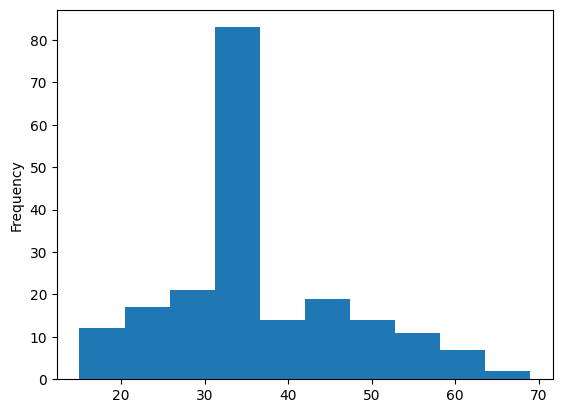

In [ ]:
# Handling missing value pada Age untuk Title=='Mrs'
handling_missing_value(df_titanic_all, 'Mrs')

In [ ]:
df_titanic_all.loc[
    (df_titanic_all['Title']=='Mrs') &
    (df_titanic_all['Age'].isna()),
    ['Age']
] = (df_titanic_all
     .loc[
         df_titanic_all['Title']=='Mrs',
         :
     ]['Age']
     .median())

	MISSING VALUES:
 Title        0
Firstname    0
Surname      0
PClass       0
Age          0
Survived     0
SexCode      0
dtype: int64
	DESCRIPTIVE STATISTICS:
 count    236.000000
mean      21.318517
std        9.529673
min        0.170000
25%       18.750000
50%       21.000000
75%       22.000000
max       63.000000
Name: Age, dtype: float64
	SEBARAN DATA:



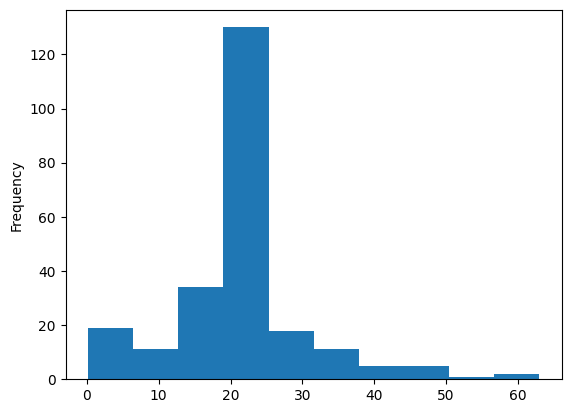

In [ ]:
handling_missing_value(df_titanic_all, 'Miss')

In [ ]:
df_titanic_all.loc[
    (df_titanic_all['Title']=='Miss') &
    (df_titanic_all['Age'].isna()),
    ['Age']
] = (df_titanic_all
     .loc[
         df_titanic_all['Title']=='Miss',
         :
     ]['Age']
     .median())

	MISSING VALUES:
 Title        0
Firstname    0
Surname      0
PClass       0
Age          0
Survived     0
SexCode      0
dtype: int64
	DESCRIPTIVE STATISTICS:
 count    61.000000
mean      4.667377
std       3.041721
min       0.330000
25%       4.000000
50%       4.000000
75%       4.000000
max      13.000000
Name: Age, dtype: float64
	SEBARAN DATA:



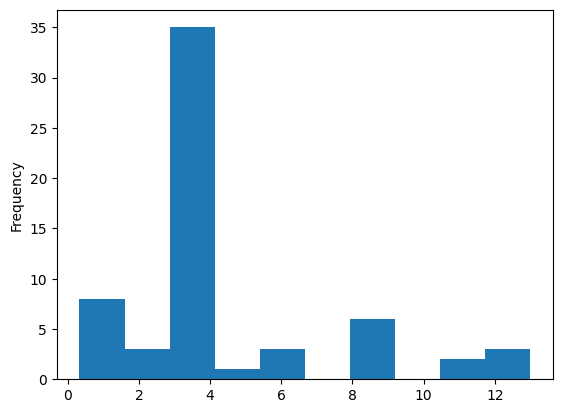

In [ ]:
handling_missing_value(df_titanic_all, 'Master')

In [ ]:
df_titanic_all.loc[
    (df_titanic_all['Title']=='Master') &
    (df_titanic_all['Age'].isna()),
    ['Age']
] = (df_titanic_all
     .loc[
         df_titanic_all['Title']=='Master',
         :
     ]['Age']
     .median())

	MISSING VALUES:
 Title        0
Firstname    0
Surname      0
PClass       0
Age          0
Survived     0
SexCode      0
dtype: int64
	DESCRIPTIVE STATISTICS:
 count    20.000000
mean     25.000000
std       0.973329
min      22.000000
25%      25.000000
50%      25.000000
75%      25.000000
max      28.000000
Name: Age, dtype: float64
	SEBARAN DATA:



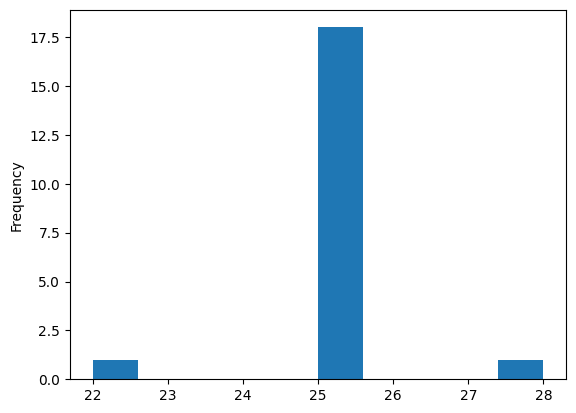

In [ ]:
handling_missing_value(df_titanic_all, 'Ms')

In [ ]:
df_titanic_all.loc[
    (df_titanic_all['Title']=='Ms') &
    (df_titanic_all['Age'].isna()),
    ['Age']
] = (df_titanic_all
     .loc[
         df_titanic_all['Title']=='Ms',
         :
     ]['Age']
     .mean())

##### Imputation menggunakan accessor `.loc`

In [ ]:
# Handling missing value pada Age untuk Title=='Jonkheer'
(df_titanic_all
 .loc[
     df_titanic_all['Title']=='Jonkheer',
      ['Age']]) = (df_titanic_all
                   .loc[
                       df_titanic_all['Title']=='Mr',
                        ['Age']]['Age'].mean())

In [ ]:
# Handling missing value pada Age untuk Title=='Madame' & 'Mlle'
(df_titanic_all
 .loc[
     df_titanic_all['Title']
     .isin(['Madame', 'Mlle']),
      ['Age']]) = (df_titanic_all
                   .loc[
                       df_titanic_all['Title']
                       .isin(['Mrs']),
                        ['Age']]['Age'].mean())

In [ ]:
(df_titanic_all
 .loc[
     df_titanic_all['Title']
     .isin(['Dr', 'Rev']),
      ['Age']]) = (df_titanic_all
                   .loc[
                       df_titanic_all['Title']
                       .isin(['Mr']),
                        ['Age']]['Age'].mean())

In [ ]:
df_titanic_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1313 entries, 1 to 1313
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      1313 non-null   object 
 1   Firstname  1313 non-null   object 
 2   Surname    1313 non-null   object 
 3   PClass     1313 non-null   object 
 4   Age        1308 non-null   float64
 5   Survived   1313 non-null   int64  
 6   SexCode    1313 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 114.4+ KB


## Menghitung Survival Rate Penumpang MS. Titanic

In [ ]:
# Total Survival Rate
(df_titanic_all
 .agg({'Survived':'sum'}))/(df_titanic_all.agg({'Survived':'count'}))*100

,0
Survived,34.272658


In [ ]:
# Survival Rate by SexCode
(df_titanic_all.groupby('SexCode')
.agg({'Survived':['sum', 'count']})
.pipe(lambda df: df.set_axis(['Survivors', 'Passengers'], axis=1))
.assign(SurvivalRate= lambda df: round(df['Survivors']/df['Passengers']*100, 2))
)

,Survivors,Passengers,SurvivalRate
SexCode,,,
0,142,851,16.69
1,308,462,66.67


In [ ]:
# Survival Rate by SexCode, PClass
(df_titanic_all.groupby(['SexCode', 'PClass'])
.agg({'Survived':['sum', 'count']})
.pipe(lambda df: df.set_axis(['Survivors', 'Passengers'], axis=1))
.assign(SurvivalRate= lambda df: round(df['Survivors']/df['Passengers']*100, 2)))

Survivors  Passengers  SurvivalRate
SexCode PClass                                     
0       *               0           1          0.00
        1st            59         179         32.96
        2nd            25         172         14.53
        3rd            58         499         11.62
1       1st           134         143         93.71
        2nd            94         107         87.85
        3rd            80         212         37.74

In [ ]:
# Survival Rate by SexCode, Title, PClass
(df_titanic_all.groupby(['SexCode', 'Title', 'PClass'])
.agg({'Survived':['sum', 'count']})
.pipe(lambda df: df.set_axis(['Survivors', 'Passengers'], axis=1))
.assign(SurvivalRate= lambda df: round(df['Survivors']/df['Passengers']*100, 2)))

Survivors  Passengers  SurvivalRate
SexCode Title           PClass                                     
0       Captain         1st             0           1          0.00
        Colonel         1st             2           4         50.00
        Dr              1st             3           5         60.00
                        2nd             0           2          0.00
        Jonkheer        1st             0           1          0.00
        Major           1st             1           2         50.00
        Master          1st             5           5        100.00
                        2nd            11          11        100.00
                        3rd             7          45         15.56
        Mr              *               0           1          0.00
                        1st            47         160         29.38
                        2nd            14         151          9.27
                        3rd            51         454         11.23
        Rev             2nd             0           8          0.00
        Sir             1st             1           1        100.00
1       Dr              1st             1           1        100.00
        Lady            1st             1           1        100.00
        Madame          1st             1           1        100.00
        Miss            1st            39          42         92.86
                        2nd            47          50         94.00
                        3rd            53         144         36.81
        Mlle            1st             1           2         50.00
        Mrs             1st            76          78         97.44
                        2nd            47          57         82.46
                        3rd            26          65         40.00
        Ms              1st            14          17         82.35
                        3rd             1           3         33.33
        the Countess of 1st             1           1        100.00

In [ ]:
# Memperoleh informasi apakah seseorang itu travelling sendiri atau bersama keluarga
# Kriteria seseorang Solo VS With Family adalah travelling lebih dari 1 pada kelas yang sama
family_or_solo_passengers = (
    df_titanic_all.groupby(['PClass', 'Surname'])
     .agg({'Firstname':'count'})
     .rename(columns={'Firstname':'Travelling'})
     .assign(Travelling=lambda df: df['Travelling'].apply(lambda x: "Solo" if x==1 else 'With Family'))
     .reset_index()
)

In [ ]:
family_or_solo_passengers

,PClass,Surname,Travelling
0,*,Jacobsohn,Solo
1,1st,Allen,Solo
2,1st,Allison,With Family
3,1st,Anderson,Solo
4,1st,Andrews,With Family
...,...,...,...
906,3rd,Youssef,Solo
907,3rd,Zabour,With Family
908,3rd,Zakarian,With Family
909,3rd,Zenni,Solo


In [ ]:
# Gabungkan hasil olahan di atas dengan dataframe original
(df_titanic_all
 .merge(
     family_or_solo_passengers,
     left_on=['PClass', 'Surname'],
     right_on=['PClass', 'Surname'],
     how='left')
 .groupby(['Travelling', 'SexCode'])
 .agg({'Survived':['count', 'sum']})
 .pipe(lambda df: df.set_axis(['Passengers', 'Survivors'], axis=1))
 .assign(SurvivalRate=lambda df: round(df['Survivors']/df['Passengers']*100, 2))
)

Passengers  Survivors  SurvivalRate
Travelling  SexCode                                     
Solo        0               504         78         15.48
            1               180        123         68.33
With Family 0               347         64         18.44
            1               282        185         65.60

In [ ]:
df_titanic_all.loc[df_titanic_all['Surname']=='Allen']

,Title,Firstname,Surname,PClass,Age,Survived,SexCode
rownames,,,,,,,
1,Miss,Elisabeth Walton,Allen,1st,29.0,1,1
621,Mr,William Henry,Allen,3rd,35.0,0,0


___